In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as ListedColormap
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score

<h3>0. Input Data</h3>

In [2]:
dataset = pd.read_excel('input/Dummy.xlsx')

<h3>1. Membagi Data untuk Training dan Testing</h3>

In [3]:
#Collecting data to analysis
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]
#Membagi data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify=y)

In [4]:
n_classes = len(np.unique(y))
print(n_classes)

5


In [5]:
#The way to check sum of training dan testing data
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

400
400
100
100


<h3>2. Standarisasi Data</h3>

In [70]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#print(X_train)
#print(X_test)

<h3>3. Klasifikasi dan Pemodelan</h3>

In [6]:
clf = KNeighborsClassifier(n_neighbors=11, p=2, metric='minkowski')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

array([2, 5, 1, 1, 1, 2, 2, 2, 2, 5, 1, 2, 2, 1, 4, 1, 4, 1, 1, 3, 5, 1,
       2, 1, 2, 4, 4, 5, 1, 5, 2, 5, 4, 2, 1, 1, 2, 5, 2, 4, 1, 2, 1, 2,
       5, 1, 5, 1, 1, 5, 5, 3, 1, 1, 2, 4, 2, 2, 2, 4, 1, 5, 1, 3, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 4, 1, 4, 2, 3, 1, 2, 1, 5, 2, 5, 1, 5, 3,
       1, 1, 3, 2, 1, 2, 1, 1, 4, 1, 2, 1], dtype=int64)

<h3>4. Evaluasi Data menggunakan Confusion Matrix</h3>

In [7]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Recall:{}'.format(recall_score(y_test, y_pred, average='macro')))
print('Precision:{}'.format(precision_score(y_test, y_pred, average='macro')))
print('F1-Score:{}'.format(f1_score(y_test, y_pred, average='macro')))

[[9 7 3 2 1]
 [8 5 1 2 5]
 [8 6 1 2 1]
 [7 5 1 3 2]
 [9 4 0 2 6]]
Recall:0.23102453102453105
Precision:0.24881826394021517
F1-Score:0.22352216748768475


<h3>5. Mengukur Akurasi</h3>

Accuracy with K-NN: 24.00%


<Axes: >

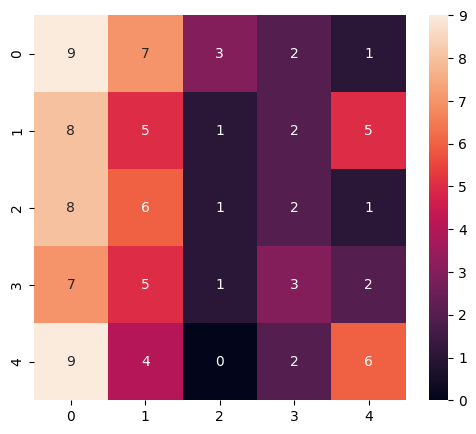

In [8]:
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy with K-NN: {0:.2f}%".format(accuracy))
plt.figure(figsize = (6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

<h3>6. Visualisasi KNN</h3>

In [9]:
n_neighbors = 11
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=0))
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))
nca = make_pipeline(StandardScaler(), NeighborhoodComponentsAnalysis(n_components=2, random_state=0))

knn = KNeighborsClassifier(n_neighbors=n_neighbors)

dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("NCA", nca)]

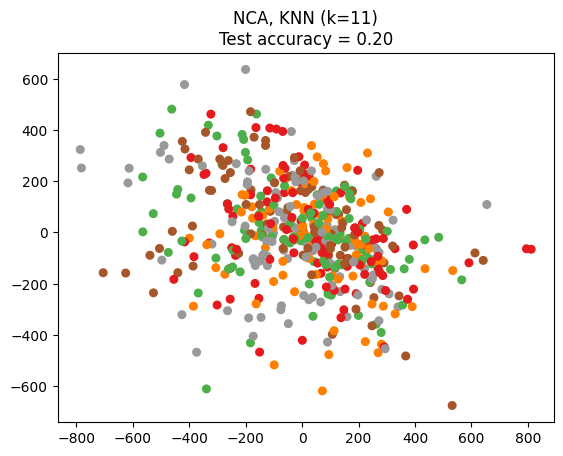

In [10]:
for i, (name, model) in enumerate(dim_reduction_methods) :
    model.fit(X_train, y_train)

    knn.fit(model.transform(X_train), y_train)

    acc_knn = knn.score(model.transform(X_test), y_test)

    X_embedded = model.transform(X)

    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
    plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn)
    )
plt.show()